In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x1 = -4
y1 = 30
x2 = 0
y2 = 2
x3 = 4
y3 = 6

In [5]:
d = np.array([y1, y2, y3])
a = np.array([x1**2, x2**2, x3**2])
b = np.array([x1, x2, x3])
c = np.array([1, 1, 1])

A = np.array([a, b, c]) #because of vector notation here I'm calling this array A'

A

array([[16,  0, 16],
       [-4,  0,  4],
       [ 1,  1,  1]])

## Projection of d, data vector onto model

Model has the form $ y_i = \alpha(x_i)^2 + \beta(x_i) + \gamma + e_i $ for $i = 1,2,3
$

$\vec{a} = \begin{pmatrix} x_1^2 \\ x_2^2 \\ x_3^2 \end{pmatrix}$      $\vec{b} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$   $\vec{c} = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$

where $\vec{e}$ is an error matrix

first, project $\vec{d}$ onto model to solve for coefficients $\alpha ,\beta, \gamma$ held in the vector $\vec{x} = \begin{pmatrix} \alpha \\ \beta \\ \gamma \end{pmatrix}$

$\vec{x} = (AA')^{-1} \cdot A' \cdot \vec{d}$



In [6]:
#projection of d onto a to solve for a, b, c

Aprime = np.transpose(A) #the way A matrix was initialized made it really A transpose
#this will return A by taking the transpose of A'

dot = d @ Aprime #this returns a vector with three elements (3x1)

AA = A @ Aprime #this returns a 3x3 matrix

inverse = np.linalg.inv(AA) #returns the inverse of A times A' matrix also a 3x3 matrix

x = inverse @ dot #returns a vector with three elements 3x1


In [7]:
alpha = x[0]
beta = x[1]
gamma = x[2]

In [8]:
print('alpha is:', alpha, 
      'beta is :', beta, 
      'gamma is :',gamma)

alpha is: 1.0 beta is : -3.0 gamma is : 2.0


The resulting values for $\alpha, \beta, \gamma$ are consistent with the values a,b,c from part a, where we solved the system of equations by hand 

## solving for $\vec{e}$ error vector

$\vec{e} = \vec{d} - P \vec{d}$

where $P = A (A'A)^{-1} A' $

In [9]:
P = inverse @ A @ Aprime

In [10]:
e = d - P @ d

In [11]:
e

array([0., 0., 0.])

the error vector is $\vec{e} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$

### suppose $y_i = A(x_i - B)(x_i -C)$ for $i = 1,2,3$

Write a system of nonlinear equations for unknowns A,B,C

$ 30 = A(-4-B)(-4-C) $      
$ 2 = ABC $         
$ 6 = A(4-B)(4-C) $

When the equations are put into the form $y_i = \alpha x_{i}^2 + \beta x_{i} + \gamma $
This makes $ \alpha = A $, $\beta = A(-C-B)$, and $\gamma=ABC$

Previously in the code, I referred to a,b,c from the homework to $\alpha, \beta, \gamma$ and will continue to in my code. 


Solve the resulting system of equations using Newton's Method
Use A=1, B=2, C=3 as the initial state

The goal is to iterate until the solution converges to our previously found values of $\alpha, \beta, \gamma$



In [12]:
#define array for the system of equations F(x)


def F(beta, x, y):
    A, B, C = beta
    x1, x2, x3 = x
    y1, y2, y3 = y
    return np.array([A * (x1-B) * (x1-C) - y1, 
                    A * (x2-B) * (x2-C) - y2, 
                    A * (x3-B) * (x3-C) - y3])

#define the jacobian matrix of F(x)

def J(beta, x):
    A, B, C = beta
    x1, x2, x3 = x
    return np.array([
        [(x1-B)*(x1-C), -A*(x1-C), -A*(x1-B)],
        [(x2-B)*(x2-C), -A*(x2-C), -A*(x2-B)], 
        [(x3-B)*(x3-C), -A*(x3-C), -A*(x3-B)]
        ])

#define initial guess for the solution
A=1
B=2
C=3

x1=-4
x2=0
x3=4

y1= 30
y2=2
y3=6

beta0 = np.array([A, B, C])

x_vec = np.array([x1, x2, x3])

y_vec = np.array([y1,y2,y3])

#define the inverse jacobian
def J_inverse(beta, x):
    return np.linalg.inv(J(beta, x))

In [13]:
#checking that this works
J(beta0,x_vec)

array([[42,  7,  6],
       [ 6,  3,  2],
       [ 2, -1, -2]])

In [14]:
#checking that this works too
J_inverse(beta0, x_vec)

array([[ 0.03125, -0.0625 ,  0.03125],
       [-0.125  ,  0.75   ,  0.375  ],
       [ 0.09375, -0.4375 , -0.65625]])

In [15]:
beta1 = beta0 - np.dot(J_inverse(beta0, x_vec), F(beta0, x_vec, y_vec))
beta1

array([1., 2., 1.])

In [16]:
#using Newton's Method, find the solution

def iterate_beta(beta, x, y):
    inverse_jacobian = np.linalg.inv(J(beta, x))
    return (beta - inverse_jacobian @ F(beta, x, y))

def newton_method(beta, x, y, max_iter=100):
    for i in range(max_iter):
        beta = iterate_beta(beta, x, y)
    return beta        
        
def another_newton_meth(beta, x, y, max_iter=100):
    beta1 = iterate_beta(beta, x, y)
    if (np.allclose(beta1, beta)):
        return beta
    else:
        return another_newton_meth(beta1, x, y)



In [17]:
iterate_beta(beta0, x_vec, y_vec)

beta_i = newton_method(beta0, x_vec, y_vec)
beta_i

array([1., 2., 1.])

In [18]:
a_scalar = beta_i[0]
b_scalar = beta_i[0]*(-beta_i[2]-beta_i[1])
c_scalar = beta_i[0]*beta_i[1]*beta_i[2]

In [19]:
print(a_scalar,b_scalar,c_scalar)

1.0 -3.0 2.0


## YAY! Newton's method returns the values for $\alpha = 1, \beta = -3, \gamma = 2$ that we expected!

I wrote another method for newton's method, I noticed that when I started at different values for the zeroth iteration, the two methods tended to converge at another value. [1,1,2] I want to see if they give us the same expected values for $\alpha, \beta, \gamma$

In [20]:
some_beta = np.array([13,7,8])
iterate_beta(some_beta, x_vec, y_vec)
beta_1 = newton_method(some_beta, x_vec, y_vec)
beta_2 = another_newton_meth(some_beta, x_vec, y_vec)

print(beta_1, beta_2)

a_scalar_1 = beta_1[0]
b_scalar_1 = beta_1[0]*(-beta_1[2]-beta_1[1])
c_scalar_1 = beta_1[0]*beta_1[1]*beta_1[2]

a_scalar_2 = beta_2[0]
b_scalar_2 = beta_2[0]*(-beta_2[2]-beta_2[1])
c_scalar_2 = beta_2[0]*beta_2[1]*beta_2[2]

print("The values for a, b, c from newton's method one, using a new zeroth iteration beta [13,7,8] is:", a_scalar_1, b_scalar_1, c_scalar_1)
print("The values for a, b, c from newton's method two, using a new zeroth iteration beta [13,7,8] is:", a_scalar_2, b_scalar_2, c_scalar_2)


[1. 1. 2.] [1.        0.9999901 2.0000099]
The values for a, b, c from newton's method one, using a new zeroth iteration beta [13,7,8] is: 1.0 -3.0 2.0
The values for a, b, c from newton's method two, using a new zeroth iteration beta [13,7,8] is: 1.0 -3.0 1.9999901001380456


### Cool! Both methods work!! And the other vector it was converging to, [1,1,2] also gives the values for a,b,c (alpha, beta, gamma) that we were expecting!! This is dope. 

## What happens if you choose A = 0 as the initial iterate? Why can you rule out A=0 as a possible value?


When A=0, It causes the Jacobian matrix to have zeros in the second and third columns. This makes the matrix singular, and it can't be inverted. The method fails because the jacobian cannot be inverted. 

In [21]:
beta_000 = [0, 2, 3]
iterate_beta(beta_000, x_vec, y_vec)


LinAlgError: Singular matrix

### Make a plot that shoes the points in the B,C plane for which Newton's method converges when the given points are used with A=1 as initial iterate

In [22]:
def iterate_beta(beta, x, y):
    inverse_jacobian = np.linalg.inv(J(beta, x))
    return (beta - inverse_jacobian @ F(beta, x, y))

def newton_method(beta, x, y, max_iter=100):
    for i in range(max_iter):
        beta = iterate_beta(beta, x, y)
    return beta

n=20
B_values = np.linspace(-10,10, n)
C_values = np.linspace(-10,10,n)

def iterate_beta_check(beta, x, y):
    inverse_jacobian = np.linalg.inv(J(beta, x))
    if np.linalg.det(inverse_jacobian) == 0:
        return 0 
    else:
        return 1

def newton_check(x, y, beta, tol, max_iter=100):
    num = 0
    for i in range(max_iter):
        #beta = iterate_beta_check(beta, x, y)
        num = iterate_beta_check(beta, x, y)
    return num

In [23]:
#initialize array to hold values
plot_values = np.zeros((n,n))

beta_check = np.array([1, B])

for i, j in enumerate(B_values):
    for m, l in enumerate(C_values):
        plot_values[i,m] = newton_check(x_vec, y_vec, beta=np.array([1, j, l]), tol=1e-4, max_iter=100)

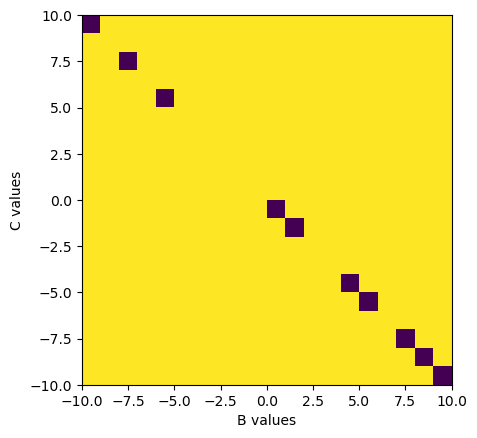

In [25]:
plt.imshow(plot_values, interpolation= 'none', extent=[-10,10,-10,10])
plt.xlabel('B values')
plt.ylabel('C values')
plt.show()